In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df.shape

(414, 9)

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# Initial Understanding

The dataset is clean and has no null values

Transaction date: represents the day the property was sold. The whole number reprenting the year and the decimal values reprenting the date & month in floats value.

House Age: represents the age of the house in float.

Distance from nearest Metro station (km): KM distance from nearest metro station

Number of convenience stores: Number of convenience stores present nearby the property

latitude:        
longitude: Location values in float

Number of bedrooms: num of bedrooms in int

House size (sqft): area of house/property

House price of unit area: Target variable

In [8]:
df.rename(columns={'Transaction date':'transaction_date','House Age':'age',
                   'Distance from nearest Metro station (km)':'metro_distance',
                  'Number of convenience stores':'stores','Number of bedrooms':'bedrooms',
                   'House size (sqft)':'area','House price of unit area':'price'}, inplace=True)

In [9]:
df.head()

,transaction_date,age,metro_distance,stores,latitude,longitude,bedrooms,area,price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<AxesSubplot:xlabel='price', ylabel='Density'>

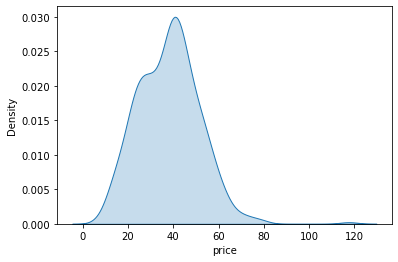

In [10]:
sns.kdeplot(data=df,x='price', shade=True)

In [11]:
df.price.skew()

0.5998525842660576

In [12]:
df.price.kurt()

2.1790970477396163

In [13]:
def check_outlier(df,col, remove_outlier=False):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    low=q1-IQR*1.5
    high=q3+IQR*1.5
    if remove_outlier==False:
        return(df[(df[col]<low)|(df[col]>high)])
    else:
        return(df[(df[col]>low)&(df[col]<high)])

In [14]:
check_outlier(df,'price', remove_outlier=False)

,transaction_date,age,metro_distance,stores,latitude,longitude,bedrooms,area,price
220,2013.333333,37.2,186.5101,9,24.97703,121.54265,2,1187,78.3
270,2013.333333,10.8,252.5822,1,24.97460,121.53046,2,1373,117.5
312,2013.583333,35.4,318.5292,9,24.97071,121.54069,1,433,78.0


Price is almost normally distributed with three outliers on the right end

In [15]:
df=check_outlier(df,'price',remove_outlier=True) # Removing entries with outlier price values

<AxesSubplot:xlabel='area', ylabel='price'>

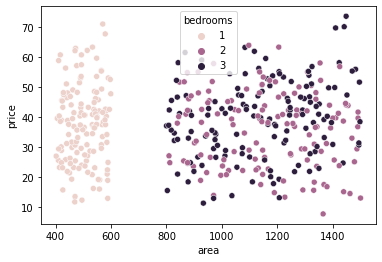

In [16]:
sns.scatterplot(data=df,x='area',y='price', hue='bedrooms')

In [17]:
df[(df.area>600)&(df.area<800)]

,transaction_date,age,metro_distance,stores,latitude,longitude,bedrooms,area,price


# We see some missing data in our area range(600-800) that needs to be taken into consideration while making/selecting model

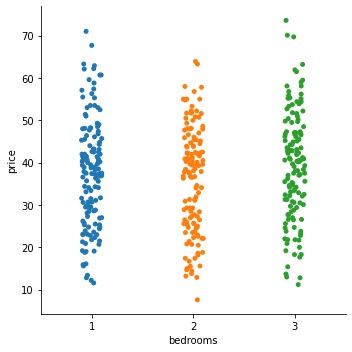

In [18]:
sns.catplot(data=df,x='bedrooms',y='price')

# bedrooms alone arent enough to influence the price of the house

<AxesSubplot:xlabel='area', ylabel='price'>

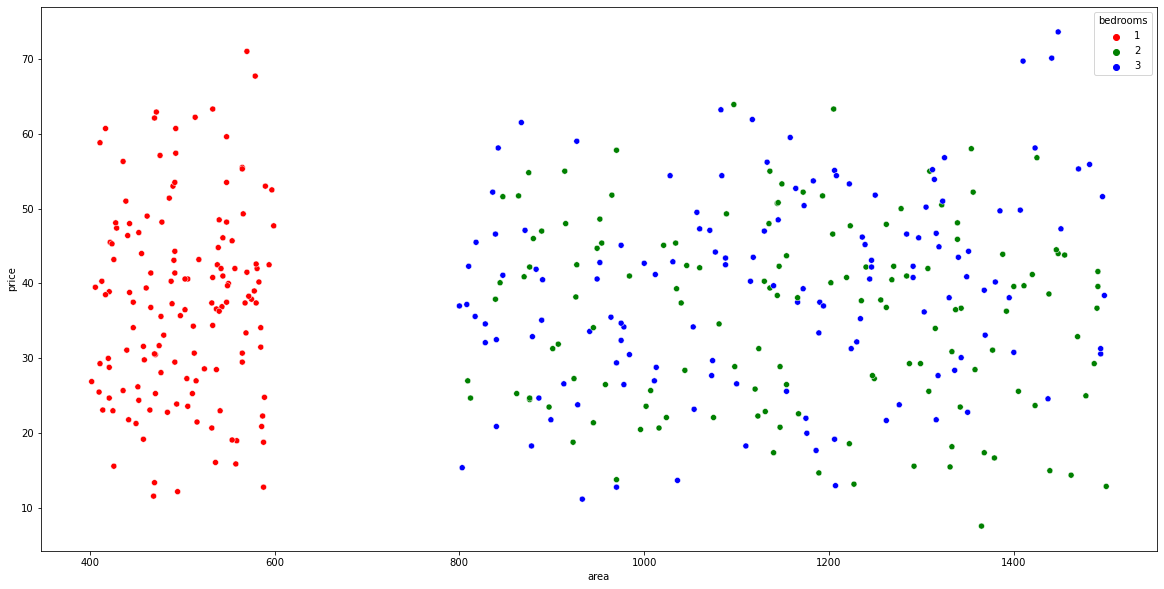

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='area',y='price', hue='bedrooms',palette={1:'red',2:'green',3:'blue'})

# All Properties under 600 sqft area are single bedrooms

<AxesSubplot:xlabel='transaction_date', ylabel='Density'>

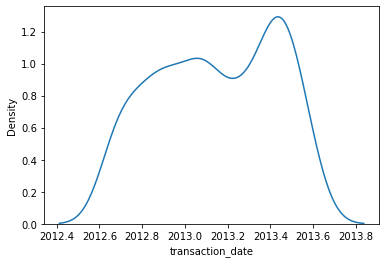

In [20]:
sns.kdeplot(data=df,x='transaction_date')

Transaction date ranges within a year and doesnt bear much importance in predicting the price. So its better to remove it.

<AxesSubplot:xlabel='transaction_date', ylabel='price'>

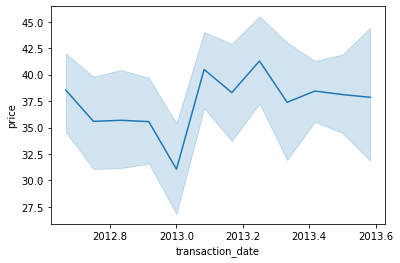

In [21]:
sns.lineplot(data=df,x='transaction_date', y='price')

In [22]:
df.transaction_date.value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.000000    28
2013.333333    27
2012.750000    27
2013.166667    25
2013.583333    22
Name: transaction_date, dtype: int64

In [23]:
df.groupby('transaction_date').aggregate(['mean','std']).price

,mean,std
transaction_date,,
2012.666667,38.543333,11.273946
2012.750000,35.581481,11.737089
2012.833333,35.683871,14.036194
2012.916667,35.557895,12.848801
2013.000000,31.057143,11.970625
2013.083333,40.493478,12.135703
2013.166667,38.304000,11.680985
2013.250000,41.293750,12.335130
2013.333333,37.388889,14.932833


In [24]:
df.drop('transaction_date', axis=1, inplace=True)

In [25]:
df.head()

,age,metro_distance,stores,latitude,longitude,bedrooms,area,price
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


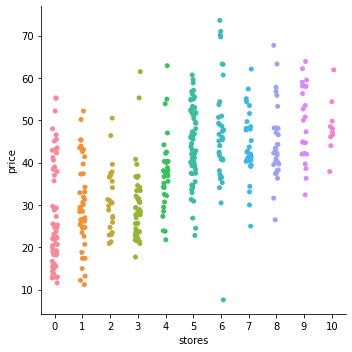

In [26]:
sns.catplot(data=check_outlier(df,'price',remove_outlier=True),x='stores',y='price')

# The number of stores in neighbourhood does have a great impact on base price of the property

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

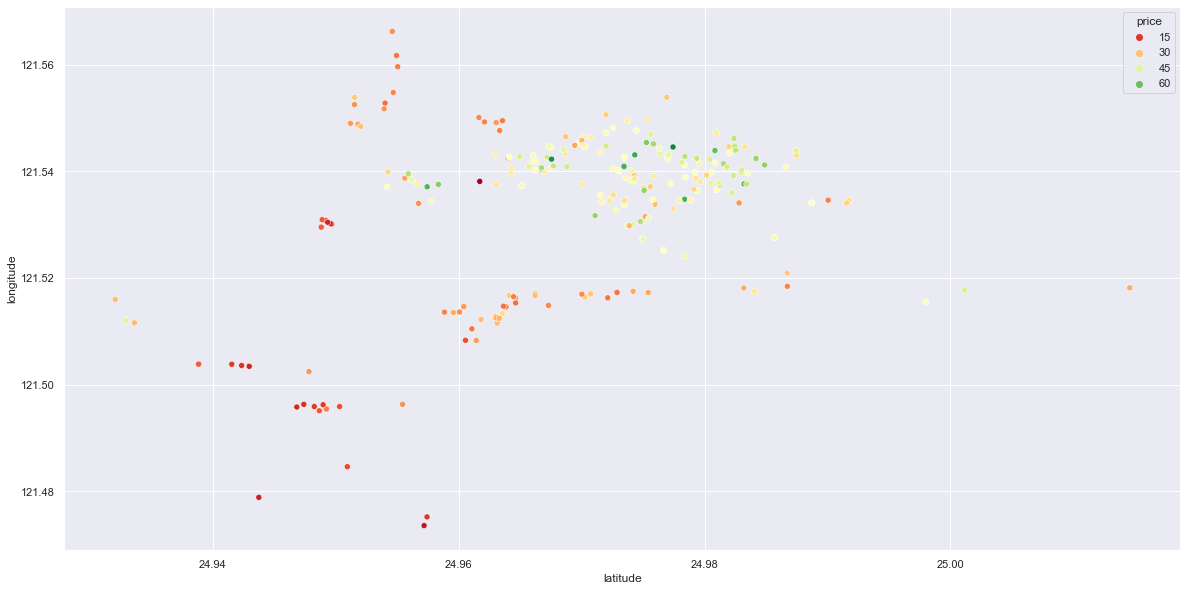

In [27]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=df,x='latitude',y='longitude', hue='price',palette='RdYlGn')

# Location of a property has a big role in its price. Needs to be further categorized

In [28]:
def check_elbow(n):
    km=KMeans(n_clusters=n)
    km.fit(df[['latitude','longitude']])
    return km.inertia_

In [29]:
error=[]
values=[]
for i in range(1,10):
    values.append(i)
    error.append(check_elbow(i))

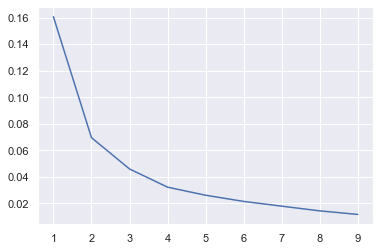

In [30]:
sns.lineplot(x=values,y=error)
plt.xticks=1

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

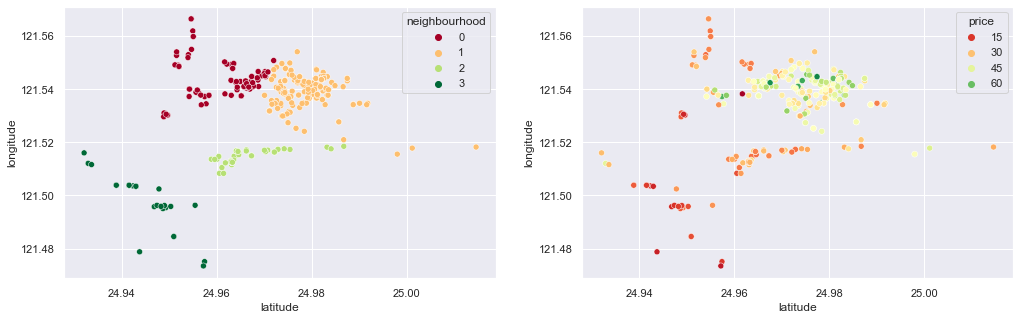

In [31]:
km=KMeans(n_clusters=4)
km.fit(df[['latitude','longitude']])
y=km.predict(df[['latitude','longitude']])
df['neighbourhood']=y

fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.scatterplot(data=df,x='latitude',y='longitude', hue='neighbourhood',palette='RdYlGn', ax=ax[0])
sns.scatterplot(data=df,x='latitude',y='longitude', hue='price',palette='RdYlGn',ax=ax[1])

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

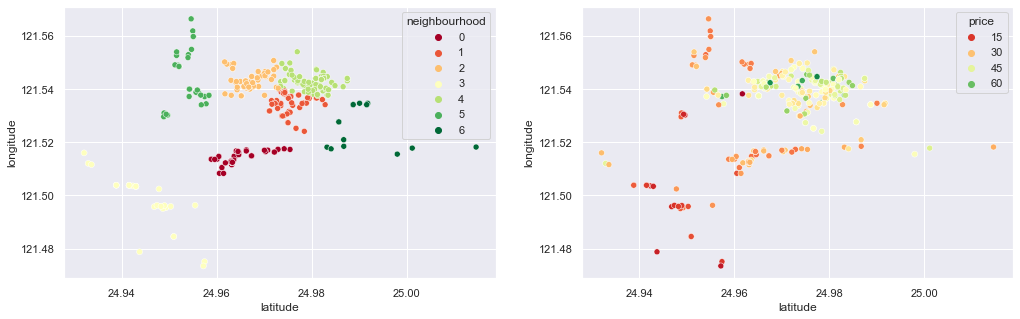

In [32]:
km=KMeans(n_clusters=7)
km.fit(df[['latitude','longitude']])
y=km.predict(df[['latitude','longitude']])
df['neighbourhood']=y

fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.scatterplot(data=df,x='latitude',y='longitude', hue='neighbourhood',palette='RdYlGn', ax=ax[0])
sns.scatterplot(data=df,x='latitude',y='longitude', hue='price',palette='RdYlGn',ax=ax[1])


# Although the elbow signals at dividing the dataset into 4 clusters we see here that dividing it into 7 clusters will group our data in a better way

In [33]:
df.sample(5)

,age,metro_distance,stores,latitude,longitude,bedrooms,area,price,neighbourhood
276,19.1,461.1016,5,24.95425,121.53990,2,1315,34.0,5
214,18.1,1783.1800,3,24.96731,121.51486,1,586,20.9,0
359,5.6,2408.9930,0,24.95505,121.55964,2,876,24.7,5
248,19.0,1009.2350,0,24.96357,121.54951,2,1123,22.3,2
127,3.8,383.8624,5,24.98085,121.54391,2,1136,55.0,4


# Categorizing locations into neighbourhood and dropping latitude & longitude columns

In [34]:
df.drop(columns=['latitude','longitude'], inplace=True)

In [35]:
df.neighbourhood.describe()

count    411.000000
mean       2.751825
std        1.747951
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: neighbourhood, dtype: float64

In [36]:
df.neighbourhood=df.neighbourhood.astype('category')

In [37]:
df.neighbourhood.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

# Distance from nearest metro station

<AxesSubplot:title={'center':'Relation between Price and Metro Distance'}, xlabel='metro_distance', ylabel='price'>

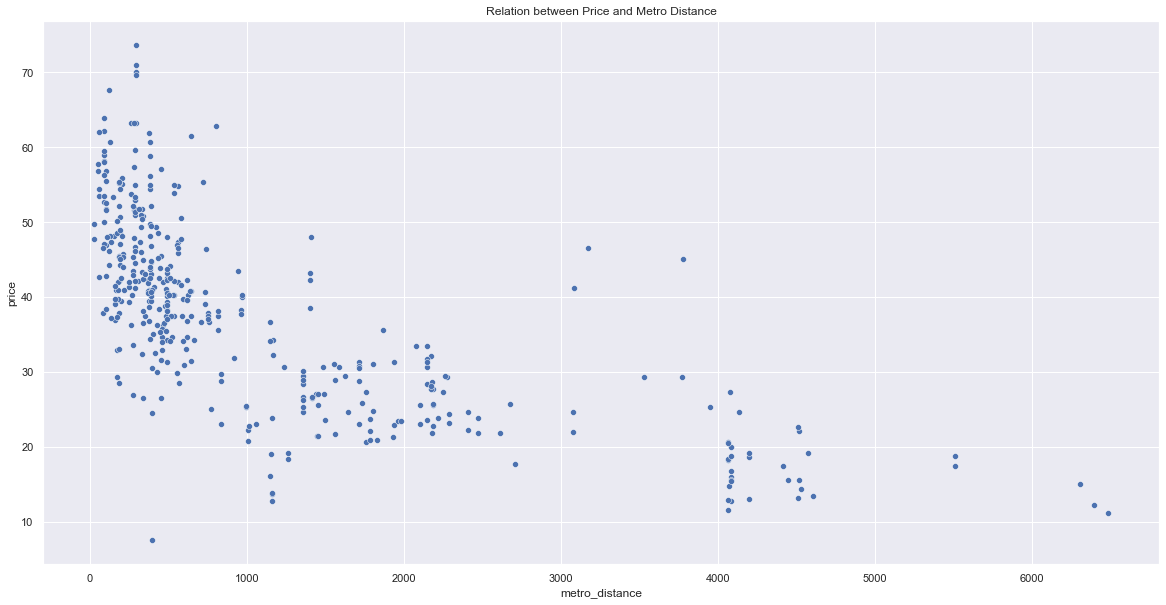

In [38]:
plt.figure(figsize=(20,10))
plt.title("Relation between Price and Metro Distance")
sns.scatterplot(data=df,x='metro_distance',y='price')

In [39]:
df.metro_distance.corr(df.price)

-0.7013491836633241

# An inverse relation can be spotted in the plot with price and metro_distance

<AxesSubplot:title={'center':'Relation between Price and Age'}, xlabel='age', ylabel='price'>

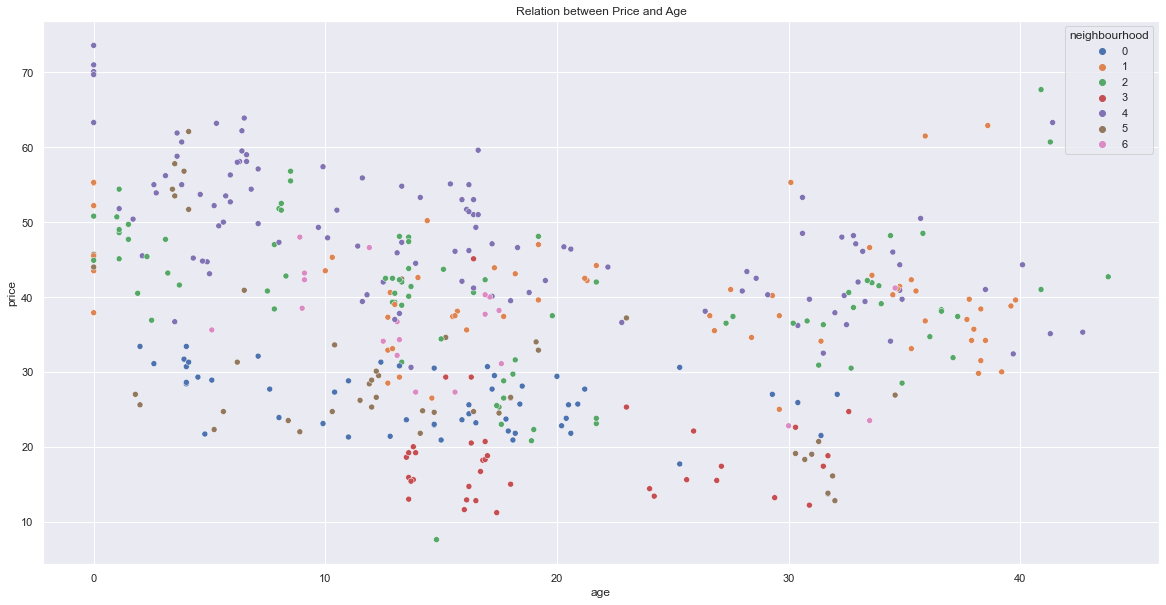

In [40]:
plt.figure(figsize=(20,10))
plt.title("Relation between Price and Age")
sns.scatterplot(data=df,x='age',y='price', hue='neighbourhood')

Text(0.5, 1.0, 'Neighbourhood 3')

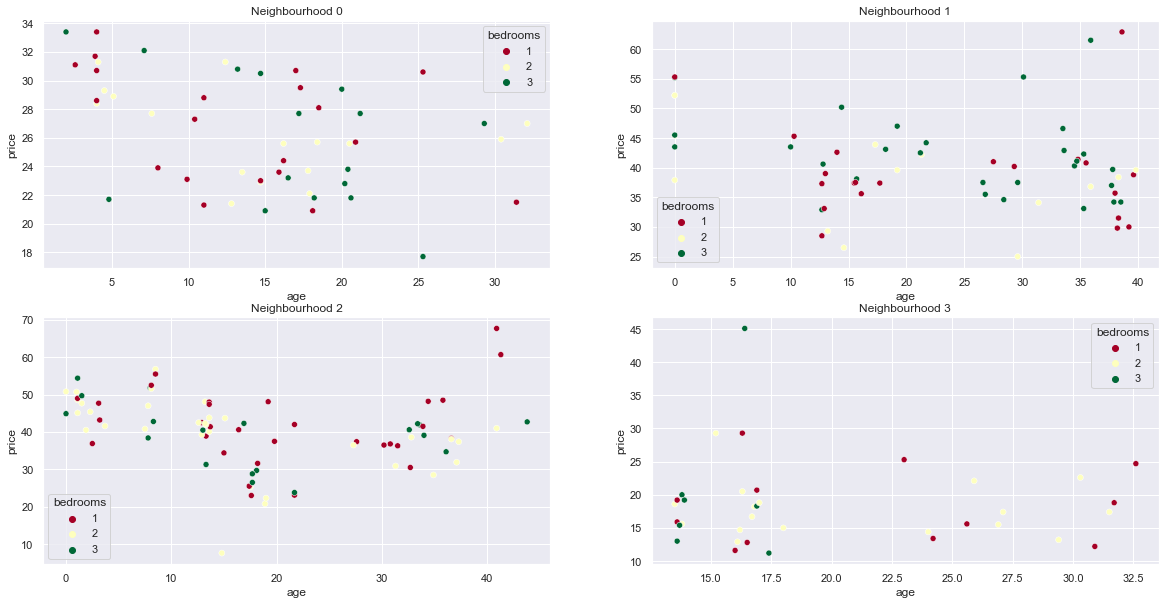

In [41]:
fig,ax=plt.subplots(2,2, figsize=(20,10))
sns.scatterplot(data=df[df.neighbourhood==0],x='age',y='price',hue='bedrooms',palette='RdYlGn',ax=ax[0,0])
ax[0,0].set_title("Neighbourhood 0")
sns.scatterplot(data=df[df.neighbourhood==1],x='age',y='price',hue='bedrooms',palette='RdYlGn',ax=ax[0,1])
ax[0,1].set_title("Neighbourhood 1")
sns.scatterplot(data=df[df.neighbourhood==2],x='age',y='price',hue='bedrooms',palette='RdYlGn',ax=ax[1,0])
ax[1,0].set_title("Neighbourhood 2")
sns.scatterplot(data=df[df.neighbourhood==3],x='age',y='price',hue='bedrooms',palette='RdYlGn',ax=ax[1,1])
ax[1,1].set_title("Neighbourhood 3")

# A negative pattern can be noticed in age and price of the houses which is more prominent when we separate our dataset by the neighbourhood 

In [42]:
for i in range(df.neighbourhood.nunique()):
    temp=df[df.neighbourhood==i]
    print("Correlation between Price and Age for neighbourhood {} is {}".format(i,temp.price.corr(temp.age)))

Correlation between Price and Age for neighbourhood 0 is -0.42373004883449356
Correlation between Price and Age for neighbourhood 1 is -0.23286568573972694
Correlation between Price and Age for neighbourhood 2 is -0.19909041433713678
Correlation between Price and Age for neighbourhood 3 is -0.04341109004836768
Correlation between Price and Age for neighbourhood 4 is -0.5892015317920075
Correlation between Price and Age for neighbourhood 5 is -0.6456086278372176
Correlation between Price and Age for neighbourhood 6 is -0.45754927419561364


In [43]:
df.head()

,age,metro_distance,stores,bedrooms,area,price,neighbourhood
0,32.0,84.87882,10,1,575,37.9,4
1,19.5,306.59470,9,2,1240,42.2,4
2,13.3,561.98450,5,3,1060,47.3,4
3,13.3,561.98450,5,2,875,54.8,4
4,5.0,390.56840,5,1,491,43.1,4


In [44]:
df=pd.get_dummies(df)

In [45]:
df.head()

,age,metro_distance,stores,bedrooms,area,price,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6
0,32.0,84.87882,10,1,575,37.9,0,0,0,0,1,0,0
1,19.5,306.59470,9,2,1240,42.2,0,0,0,0,1,0,0
2,13.3,561.98450,5,3,1060,47.3,0,0,0,0,1,0,0
3,13.3,561.98450,5,2,875,54.8,0,0,0,0,1,0,0
4,5.0,390.56840,5,1,491,43.1,0,0,0,0,1,0,0


<AxesSubplot:>

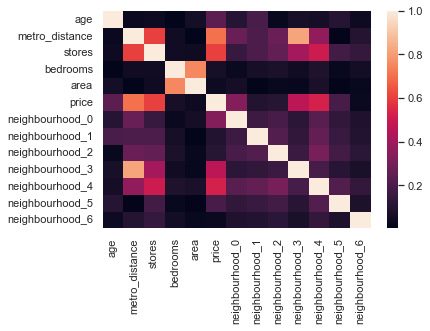

In [46]:
sns.heatmap(abs(df.corr()))